<a href="https://colab.research.google.com/github/Vinayak-Sharma12/Data-Science/blob/main/9_1_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
f=fetch_california_housing()

In [ ]:
df=pd.DataFrame(f.data)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.columns=f.feature_names

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Adding Target Column

In [ ]:
df['target']=f.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Checking if there is any null value in any column

In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


Checking if There is some OUTLIERS or not

For Single Feature Boxplot

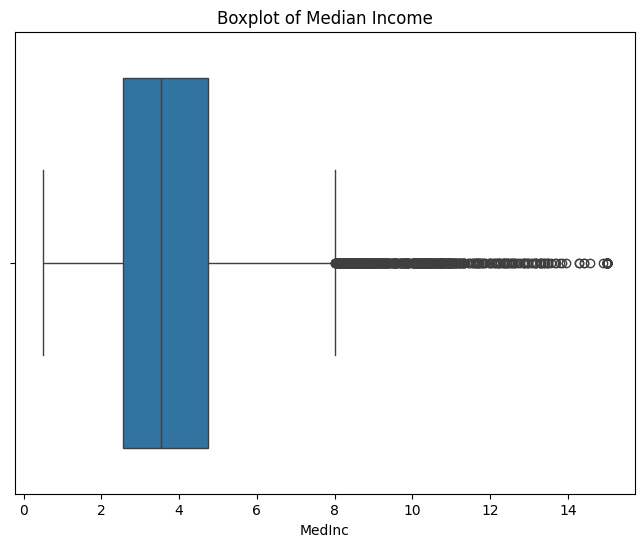

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MedInc'])
plt.title('Boxplot of Median Income')
plt.show()
#you can see there are lot of outliers in this particular

Boxplot for all feature

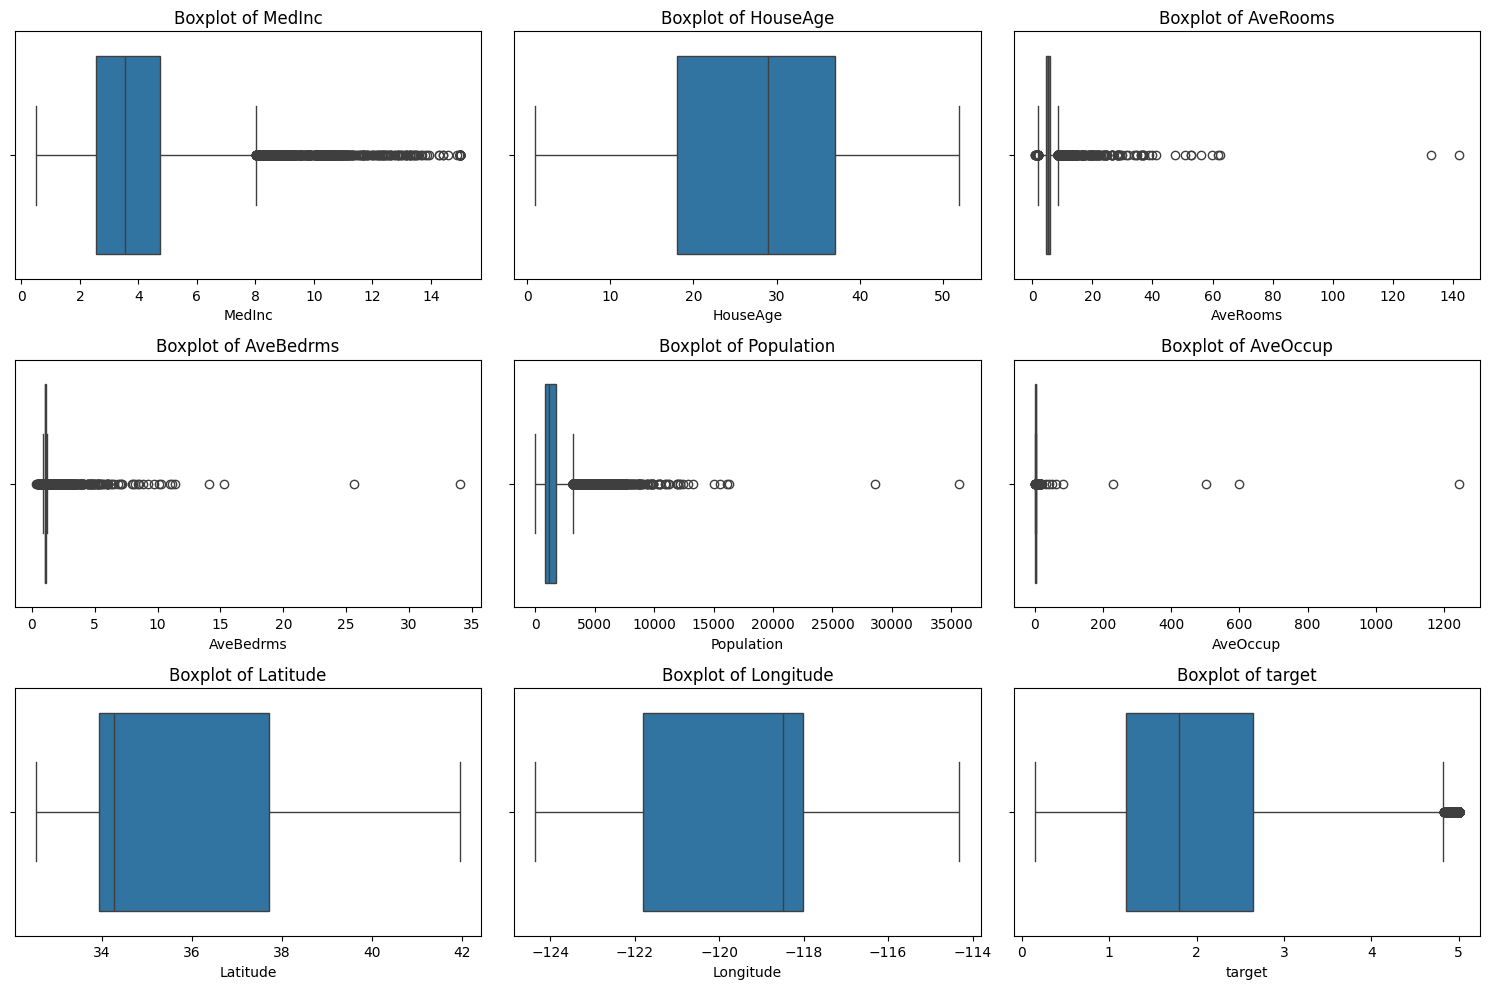

In [ ]:
# YOU CAN SEE THERE ARE SOME VERY FUCKED UP OUTLIERS IN SOME FEATURES

import matplotlib.pyplot as plt
# Boxplot for all features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### BEFORE DOING TRAIN AND TEST SPLIT SEPERATE DEPENDENT(TARGET) AND INDEPENDENT COLUMNS(FEATURES)

In [ ]:
X=df.iloc[:,:-1]

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
Y=df.iloc[:,-1]

In [ ]:
Y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### **TRAIN TEST SPLIT**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

### ***APPLY LINEAR REGRESSION MODEL ON THE DATA***

In [ ]:
model1=LinearRegression()

In [ ]:
model1.fit(x_train,y_train)
# these two are the parameters of Linear Regression

LinearRegression()

**NOTE** -> you can't check training loss(mse) during training unlike you can do in Deep Learning

In [ ]:
predict=model1.predict(x_test,)

In [ ]:
print(predict)

[0.72563462 1.76650223 2.70545812 ... 1.25803135 1.66673014 2.25826279]


###**NOTE**->Can't draw Confusion matrix and classification report as it is for classification problem

# **PERFROMANCE MATRICS**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
mean_sq_error=mean_squared_error(y_test,predict)

In [ ]:
print(mean_sq_error)

0.5369686543372453


In [ ]:
import math as m

In [ ]:
root_mean_sq_error=m.sqrt(mean_squared_error(y_test,predict))

In [ ]:
print(root_mean_sq_error)

0.7327814505957729


In [ ]:
r2=r2_score(y_test,predict)

In [ ]:
print(r2)

0.5970494128783957


# **SCATTERPLOT**
 AS THERE IS POSITIVE CORRELATION WE CAN SEE IN PLOT SO IT MEANS OUR MODEL IS ABLE TO CAPTURE THE UNDERLYING PATTERN IN THE DATA
ALSO MOST OF THE VALUES ARE AT DIAGONAL THAT MEANS OUR MODEL IS ARE ACTUAL AND PREDICTED VALUE ARE VERY CLOSE


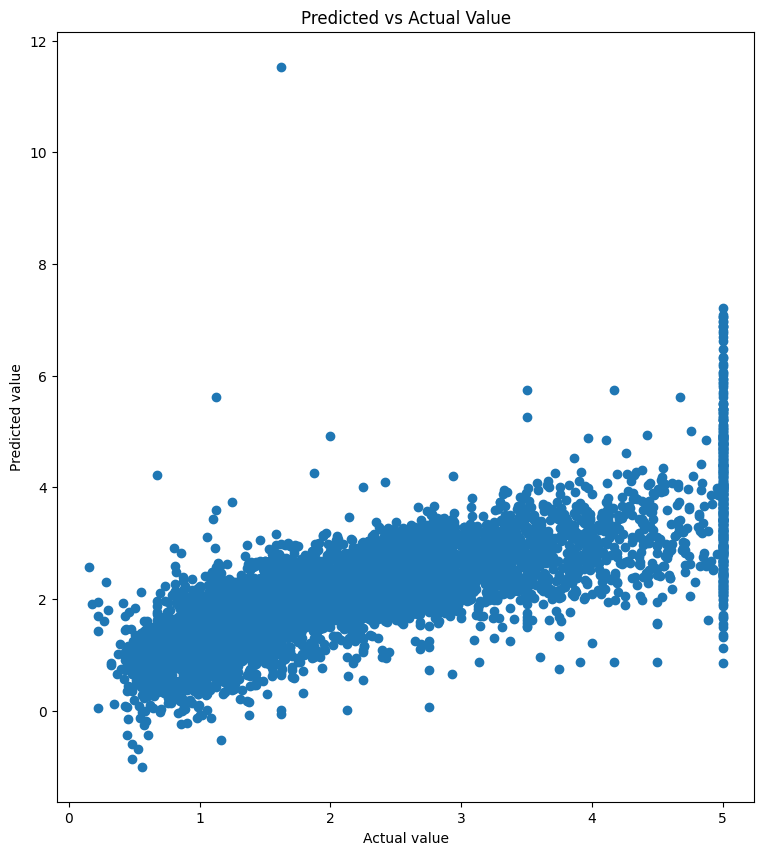

In [ ]:
plt.figure(figsize=(9,10))
plt.scatter(y_test,predict)
plt.title('Predicted vs Actual Value')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

### **MODEL->Lasso and Ridge**

In [ ]:
from sklearn.linear_model import Lasso,Ridge

In [ ]:
# Remember that Apha parameter in L1 regularization that Decide how strict will be the penalization
# New L=L+ alpha|W|
model2=Lasso(alpha=1,max_iter=1000)

In [ ]:
model2.fit(x_train,y_train)

Lasso(alpha=1)

In [ ]:
predict=model2.predict(x_test)

In [ ]:
print(predict)

[1.72630665 1.87818227 2.14563976 ... 1.97491013 2.02223922 2.03496941]


# **PERFORMANCE METRICS**

MEAN SQUARED ERROR

In [ ]:
err=mean_squared_error(y_test,predict)

In [ ]:
print(err)

0.9534578797140748


In [ ]:
r2score=r2_score(y_test,predict)

In [ ]:
print(r2score)

0.28450867788418377


#  **MODEL-> RIDGE**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model3=Ridge()

In [ ]:
model3.fit(x_train,y_train)

Ridge()

In [ ]:
predict=model3.predict(x_test)

### **PERFORMNACE METRICS**

In [ ]:
er=mean_squared_error(y_test,predict)

In [ ]:
print(er)

0.5369085976357088


In [ ]:
r2=r2_score(y_test,predict)

In [ ]:
print(r2)

0.5970944804683738


#**CONCLUSION**

### By Comparing These Three Models Linear Regression,Lasso and Ridge we came to conclusion that Linear and Ridge regression Performed Equally well where as Lasso didn't perform well one reason can be Lasso make cofficients of columns zero or can be some mistake in my coding

BEST MODEL -> LINEAR REGRESSION AND RIDGE
